# PPD dos dados para treinamento, validação e teste

In [1]:
##importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from numpy import median, mean
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

* Outlier =  1 normal
* Outlier = -1 anormal

### IMPORTANDO DATASETS

In [2]:
## importando dataset frequencia pivotado
df_freq = pd.read_csv('dataseteh/pp3/eh-freq_pp3.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq.shape)
df_freq.head()

(366, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,3.0,2.0,4.0,1.0,6.0,10.0
1,2,1,0,3.0,3.0,5.0,2.0,4.0,10.0
2,3,2,0,3.0,2.0,3.0,2.0,7.0,8.0
3,4,3,0,2.0,3.0,3.0,2.0,5.0,11.0
4,5,4,0,2.0,3.0,2.0,2.0,3.0,4.0


In [3]:
#importando dataset duracao pivotado
df_dur = pd.read_csv('dataseteh/pp3/eh-dur_pp3.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur.shape)
df_dur.head()

(366, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,1319.0,4407.0,1600.0,2684.0,2840.0,2971.0
1,2,1,0,1242.0,7409.0,2122.0,4710.0,1937.0,2659.0
2,3,2,0,1513.0,3845.0,1157.0,6173.0,2800.0,2359.0
3,4,3,0,959.0,7010.0,1400.0,5820.0,2401.0,2862.0
4,5,4,0,947.0,8027.0,846.0,5823.0,1429.0,1066.0


In [4]:
#importando dataset duracao/frequencia pivotado
df_dfreq = pd.read_csv('dataseteh/pp3/eh-dfreq_pp3.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq.shape)
df_dfreq.head()

(366, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,439.666667,2203.500000,400.000000,2684.0,473.333333,297.100000
1,2,1,0,414.000000,2469.666667,424.400000,2355.0,484.250000,265.900000
2,3,2,0,504.333333,1922.500000,385.666667,3086.5,400.000000,294.875000
3,4,3,0,479.500000,2336.666667,466.666667,2910.0,480.200000,260.181818
4,5,4,0,473.500000,2675.666667,423.000000,2911.5,476.333333,266.500000


### Separando dados TREINAMENTO

In [5]:
#DURACAO
#P1 semana 0 a semana 18 = 18 semanas
df_dur_trein = df_dur.iloc[0:126].copy()
print(df_dur_trein.shape)
df_dur_trein.head()

(126, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,1319.0,4407.0,1600.0,2684.0,2840.0,2971.0
1,2,1,0,1242.0,7409.0,2122.0,4710.0,1937.0,2659.0
2,3,2,0,1513.0,3845.0,1157.0,6173.0,2800.0,2359.0
3,4,3,0,959.0,7010.0,1400.0,5820.0,2401.0,2862.0
4,5,4,0,947.0,8027.0,846.0,5823.0,1429.0,1066.0


In [6]:
#FREQUENCIA
#P1 semana 0 a semana 18 = 18 semanas
df_freq_trein = df_freq.iloc[0:126].copy()
print(df_freq_trein.shape)
df_freq_trein.head()

(126, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,3.0,2.0,4.0,1.0,6.0,10.0
1,2,1,0,3.0,3.0,5.0,2.0,4.0,10.0
2,3,2,0,3.0,2.0,3.0,2.0,7.0,8.0
3,4,3,0,2.0,3.0,3.0,2.0,5.0,11.0
4,5,4,0,2.0,3.0,2.0,2.0,3.0,4.0


In [7]:
#D FREQUENCIA
#P1 semana 0 a semana 18 = 18 semanas
df_dfreq_trein = df_dfreq.iloc[0:126].copy()
print(df_dfreq_trein.shape)
df_dfreq_trein.head()

(126, 9)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface
0,1,0,0,439.666667,2203.500000,400.000000,2684.0,473.333333,297.100000
1,2,1,0,414.000000,2469.666667,424.400000,2355.0,484.250000,265.900000
2,3,2,0,504.333333,1922.500000,385.666667,3086.5,400.000000,294.875000
3,4,3,0,479.500000,2336.666667,466.666667,2910.0,480.200000,260.181818
4,5,4,0,473.500000,2675.666667,423.000000,2911.5,476.333333,266.500000


In [8]:
#exportando os dataset
df_dur_trein.to_csv(r'dataseteh/pp4/eh-dur-trein126.csv', sep=';', index=False, decimal=',')
#exportando os dataset
df_freq_trein.to_csv(r'dataseteh/pp4/eh-freq-trein126.csv', sep=';', index=False, decimal=',')
#exportando os dataset
df_dfreq_trein.to_csv(r'dataseteh/pp4/eh-dfreq-trein126.csv', sep=';', index=False, decimal=',')

### Separando dados VALIDACAO

In [9]:
#DURACAO
#10 semanas
df_dur_valid = df_dur.iloc[126:196].copy()
df_dur_valid.dia = df_dur_valid.dia - 126
df_dur_valid = df_dur_valid.reset_index()
df_dur_valid.drop('index', inplace=True, axis=1)
df_dur_valid['var_cclothes'] = 1
df_dur_valid['var_eating'] = 1
df_dur_valid['var_mcoffe'] = 1
df_dur_valid['var_mhotfood'] = 1
df_dur_valid['var_toileting'] = 1
df_dur_valid['var_whandface'] = 1
df_dur_valid['outlier'] = 1
df_dur_valid['variacao'] = '0'
print(df_dur_valid.shape)
df_dur_valid.head()

(70, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,1017.0,3913.0,890.0,5447.0,2480.0,1558.0,1,1,1,1,1,1,1,0
1,2,1,0,944.0,8073.0,1666.0,2334.0,2203.0,2136.0,1,1,1,1,1,1,1,0
2,3,2,0,1470.0,5348.0,576.0,2430.0,1038.0,1756.0,1,1,1,1,1,1,1,0
3,4,3,0,1335.0,3903.0,1630.0,3026.0,2958.0,2857.0,1,1,1,1,1,1,1,0
4,5,4,0,708.0,8166.0,1353.0,5338.0,2522.0,2391.0,1,1,1,1,1,1,1,0


In [10]:
#FREQUNECIA
#10 semanas
df_freq_valid = df_freq.iloc[126:196].copy()
df_freq_valid.dia = df_freq_valid.dia - 126
df_freq_valid = df_freq_valid.reset_index()
df_freq_valid.drop('index', inplace=True, axis=1)
df_freq_valid['var_cclothes'] = 1
df_freq_valid['var_eating'] = 1
df_freq_valid['var_mcoffe'] = 1
df_freq_valid['var_mhotfood'] = 1
df_freq_valid['var_toileting'] = 1
df_freq_valid['var_whandface'] = 1
df_freq_valid['outlier'] = 1
df_freq_valid['variacao'] = '0'
print(df_freq_valid.shape)
df_freq_valid.head()

(70, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,2.0,2.0,2.0,2.0,6.0,6.0,1,1,1,1,1,1,1,0
1,2,1,0,2.0,3.0,4.0,1.0,5.0,8.0,1,1,1,1,1,1,1,0
2,3,2,0,3.0,2.0,1.0,1.0,2.0,8.0,1,1,1,1,1,1,1,0
3,4,3,0,3.0,2.0,3.0,1.0,7.0,11.0,1,1,1,1,1,1,1,0
4,5,4,0,2.0,3.0,3.0,2.0,6.0,9.0,1,1,1,1,1,1,1,0


In [11]:
# DFREQ
#10 semanas
df_dfreq_valid = df_dfreq.iloc[126:196].copy()
df_dfreq_valid.dia = df_dfreq_valid.dia - 126
df_dfreq_valid = df_dfreq_valid.reset_index()
df_dfreq_valid.drop('index', inplace=True, axis=1)
df_dfreq_valid['var_cclothes'] = 1
df_dfreq_valid['var_eating'] = 1
df_dfreq_valid['var_mcoffe'] = 1
df_dfreq_valid['var_mhotfood'] = 1
df_dfreq_valid['var_toileting'] = 1
df_dfreq_valid['var_whandface'] = 1
df_dfreq_valid['outlier'] = 1
df_dfreq_valid['variacao'] = '0'
print(df_dfreq_valid.shape)
df_dfreq_valid.head()

(70, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,508.5,1956.5,445.000000,2723.5,413.333333,259.666667,1,1,1,1,1,1,1,0
1,2,1,0,472.0,2691.0,416.500000,2334.0,440.600000,267.000000,1,1,1,1,1,1,1,0
2,3,2,0,490.0,2674.0,576.000000,2430.0,519.000000,219.500000,1,1,1,1,1,1,1,0
3,4,3,0,445.0,1951.5,543.333333,3026.0,422.571429,259.727273,1,1,1,1,1,1,1,0
4,5,4,0,354.0,2722.0,451.000000,2669.0,420.333333,265.666667,1,1,1,1,1,1,1,0


In [12]:
#exportando os dataset
df_dur_valid.to_csv(r'dataseteh/pp4/eh-dur-valid70.csv', sep=';', index=False, decimal=',')
#exportando os dataset
df_freq_valid.to_csv(r'dataseteh/pp4/eh-freq-valid70.csv', sep=';', index=False, decimal=',')
#exportando os dataset
df_dfreq_valid.to_csv(r'dataseteh/pp4/eh-dfreq-valid70.csv', sep=';', index=False, decimal=',')

### Separando dados TESTE

In [13]:
#DURACAO
#validacao P1 semana 18 a semana 28 = 10 semanas
df_dur_test = df_dur_valid.copy()
print(df_dur_test.shape)
df_dur_test.head()

(70, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,1017.0,3913.0,890.0,5447.0,2480.0,1558.0,1,1,1,1,1,1,1,0
1,2,1,0,944.0,8073.0,1666.0,2334.0,2203.0,2136.0,1,1,1,1,1,1,1,0
2,3,2,0,1470.0,5348.0,576.0,2430.0,1038.0,1756.0,1,1,1,1,1,1,1,0
3,4,3,0,1335.0,3903.0,1630.0,3026.0,2958.0,2857.0,1,1,1,1,1,1,1,0
4,5,4,0,708.0,8166.0,1353.0,5338.0,2522.0,2391.0,1,1,1,1,1,1,1,0


In [14]:
#FREQUENCIA
#validacao P1 semana 18 a semana 28 = 10 semanas
df_freq_test = df_freq_valid.copy()
print(df_freq_test.shape)
#df_freq_test.reset_index(drop=True, inplace=True)
df_freq_test.head()

(70, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,2.0,2.0,2.0,2.0,6.0,6.0,1,1,1,1,1,1,1,0
1,2,1,0,2.0,3.0,4.0,1.0,5.0,8.0,1,1,1,1,1,1,1,0
2,3,2,0,3.0,2.0,1.0,1.0,2.0,8.0,1,1,1,1,1,1,1,0
3,4,3,0,3.0,2.0,3.0,1.0,7.0,11.0,1,1,1,1,1,1,1,0
4,5,4,0,2.0,3.0,3.0,2.0,6.0,9.0,1,1,1,1,1,1,1,0


In [15]:
#DURACAO/FREQUENCIA
#validacao P1 semana 18 a semana 28 = 10 semanas
df_dfreq_test = df_dfreq_valid.copy()
print(df_dfreq_test.shape)
#df_dfreq_test.reset_index(drop=True, inplace=True)
df_dfreq_test.head()

(70, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,508.5,1956.5,445.000000,2723.5,413.333333,259.666667,1,1,1,1,1,1,1,0
1,2,1,0,472.0,2691.0,416.500000,2334.0,440.600000,267.000000,1,1,1,1,1,1,1,0
2,3,2,0,490.0,2674.0,576.000000,2430.0,519.000000,219.500000,1,1,1,1,1,1,1,0
3,4,3,0,445.0,1951.5,543.333333,3026.0,422.571429,259.727273,1,1,1,1,1,1,1,0
4,5,4,0,354.0,2722.0,451.000000,2669.0,420.333333,265.666667,1,1,1,1,1,1,1,0


In [16]:
# SEPARANDO PARTE PARA ADD OUTLIERS

In [17]:
df_dur_testA = df_dur_test.iloc[0:35].copy()
print(df_dur_testA.shape)
df_dur_testB = df_dur_test.iloc[35:70].copy()
print(df_dur_testB.shape)

df_freq_testA = df_freq_test.iloc[0:35].copy()
print(df_freq_testA.shape)
df_freq_testB = df_freq_test.iloc[35:70].copy()
print(df_freq_testB.shape)

df_dfreq_testA = df_dfreq_test.iloc[0:35].copy()
print(df_dfreq_testA.shape)
df_dfreq_testB = df_dfreq_test.iloc[35:70].copy()
print(df_dfreq_testB.shape)

(35, 17)
(35, 17)
(35, 17)
(35, 17)
(35, 17)
(35, 17)


In [18]:
## adiciona outliers de acordo com as variações 20-35 40-55 60-75 80-95
df_freq_var = pd.DataFrame()
df_dur_var = pd.DataFrame()
df_dfreq_var = pd.DataFrame()

# acrescimo no valor faixas 20-35 40-55 60-75 80-95 20-95
passo = 20
random.seed(12345)

for k in range(5): #percorrendo variações
    
    #ajusta fator multiplicacao
    fator = k+1
    fup = fator * passo
    fdw = (fup + passo) - 5
    print('\n')
    print('*****',fup)
    print('*****',fdw)
    dft_freq_test = df_freq_testA.copy()
    dft_dur_test = df_dur_testA.copy()
    dft_dfreq_test = df_dfreq_testA.copy()
    
    if (k==4):
        fup = 20
        fdw = 95

    for ind in dft_dur_test.index:

        #random.seed(ind+1)
        mfreq = random.randint(2,2)        
        xx = random.randint(3,6) #escolhe o no. de colunas que serão modificadas
        fvar = random.randint(fup,fdw) # escolhe fator de modificação na faixa atual
        print('\nNo colunas alteradas: ',xx)
        lista = random.sample(['cclothes','eating','mcoffe','mhotfood','toileting','whandface'], k=xx) #seleciona randomicamente as colunas a serem modificadas

        
        for item in enumerate(lista):

            updown = random.randint(1,2) # 1 acrescimo no valor, 2 decrescimo no valor
            coluna = item[1] #coluna a ser modificada

            print('\nColuna: ',coluna)
            print('Fator aumento: ',fvar)
            print('cima ou baixo: ',updown)

            #armazena valor atual
            valor_atual_freq = dft_freq_test[coluna][ind]
            valor_atual_dur = dft_dur_test[coluna][ind]
            #reseta contadores
            novo_valor_dfreq = 0
            novo_valor_dur = 0
            novo_valor_freq = 0
                
            #aplica variações
            if (valor_atual_freq > 2):
                if (updown == 1):
                    novo_valor_freq = dft_freq_test[coluna][ind] + ((dft_freq_test[coluna][ind] * fvar)/100) + k
                    novo_valor_dur  = dft_dur_test[coluna][ind]  - ((dft_dur_test[coluna][ind]  * fvar)/100)
                else:
                    novo_valor_freq = dft_freq_test[coluna][ind] - ((dft_freq_test[coluna][ind] * fvar)/100) + k
                    if novo_valor_freq < 1:
                        novo_valor_freq = 1
                    novo_valor_dur  = dft_dur_test[coluna][ind]  + ((dft_dur_test[coluna][ind]  * fvar)/100)
            else:
                if (updown == 1):
                    novo_valor_freq = mfreq + dft_freq_test[coluna][ind] + ((dft_freq_test[coluna][ind] * fvar)/100) + k
                    novo_valor_dur  = dft_dur_test[coluna][ind]  - ((dft_dur_test[coluna][ind]  * fvar)/100)
                else:
                    novo_valor_freq = mfreq + dft_freq_test[coluna][ind] - ((dft_freq_test[coluna][ind] * fvar)/100) + k
                    if novo_valor_freq < 1:
                        novo_valor_freq = 1
                    novo_valor_dur  = dft_dur_test[coluna][ind]  + ((dft_dur_test[coluna][ind]  * fvar)/100)

            #formatando valores e recalculando dfreq
            novo_valor_freq = int(novo_valor_freq)
            novo_valor_dur = int(novo_valor_dur)
            novo_valor_dfreq = novo_valor_dur / novo_valor_freq
            novo_valor_dfreq = int(novo_valor_dfreq)
            var = 'var_'+coluna

            #atualizando dataframe 
            dft_freq_test[coluna][ind] = novo_valor_freq
            dft_freq_test[var][ind] = -1
            dft_freq_test['outlier'][ind] = -1        

            dft_dur_test[coluna][ind] = novo_valor_dur
            dft_dur_test[var][ind] = -1
            dft_dur_test['outlier'][ind] = -1        

            dft_dfreq_test[coluna][ind] = novo_valor_dfreq
            dft_dfreq_test[var][ind] = -1
            dft_dfreq_test['outlier'][ind] = -1
            
            variacao = str(fup)+'-'+str(fdw)
            if (k==4):
                variacao = '20-95'
            
            dft_freq_test['variacao'] = variacao
            dft_dur_test['variacao'] = variacao
            dft_dfreq_test['variacao'] = variacao
            
            #printando para conferencia
            print('Atividade: ',coluna)
            print('Valor atual  dur: ',valor_atual_dur)
            print('Novo valor   dur: ',dft_dur_test[coluna][ind])
            print('Valor atual freq: ',valor_atual_freq)
            print('Novo valor  freq: ',dft_freq_test[coluna][ind]) 

    #criando novos datasets
    df_freq_testB['variacao'] = variacao
    dftc_freq_test = pd.concat([dft_freq_test, df_freq_testB],ignore_index=True)
    dftc_freq_test['dia'] = np.arange(len(dftc_freq_test))
    dftc_freq_test['dia'] = dftc_freq_test['dia']+1
    
    df_dur_testB['variacao'] = variacao
    dftc_dur_test = pd.concat([dft_dur_test, df_dur_testB],ignore_index=True)
    dftc_dur_test['dia'] = np.arange(len(dftc_dur_test))
    dftc_dur_test['dia'] = dftc_dur_test['dia']+1
    
    df_dfreq_testB['variacao'] = variacao    
    dftc_dfreq_test = pd.concat([dft_dfreq_test, df_dfreq_testB],ignore_index=True)   
    dftc_dfreq_test['dia'] = np.arange(len(dftc_dfreq_test))
    dftc_dfreq_test['dia'] = dftc_dfreq_test['dia']+1

    dftc_freq_test.to_csv(r'dataseteh/pp4/eh-freq-var'+variacao+'-test70.csv', sep=';', index=False, decimal=',')
    dftc_dur_test.to_csv(r'dataseteh/pp4/eh-dur-var'+variacao+'-test70.csv', sep=';', index=False, decimal=',')
    dftc_dfreq_test.to_csv(r'dataseteh/pp4/eh-dfreq-var'+variacao+'-test70.csv', sep=';', index=False, decimal=',')    
    
# # SALVAMENTO EM UM DATASET UNICO    
#     #acumulando datasets
#     acdf_freq_var = pd.concat([df_freq_var, dftc_freq_test],ignore_index=True)
#     acdf_dur_var = pd.concat([df_dur_var, dftc_dur_test],ignore_index=True)
#     acdf_dfreq_var = pd.concat([df_dfreq_var, dftc_dfreq_test],ignore_index=True)
# #exportando datasets
# acdf_freq_var.to_csv(r'dataseteh/pp4/eh-freq-vars-test10.csv', sep=';', index=False, decimal=',')
# acdf_dur_var.to_csv(r'dataseteh/pp4/eh-dur-vars-test10.csv', sep=';', index=False, decimal=',')
# acdf_dfreq_var.to_csv(r'dataseteh/pp4/eh-dfreq-vars-test10.csv', sep=';', index=False, decimal=',')




***** 20
***** 35

No colunas alteradas:  3

Coluna:  mcoffe
Fator aumento:  29
cima ou baixo:  2
Atividade:  mcoffe
Valor atual  dur:  890.0
Novo valor   dur:  1148.0
Valor atual freq:  2.0
Novo valor  freq:  3.0

Coluna:  eating
Fator aumento:  29
cima ou baixo:  1
Atividade:  eating
Valor atual  dur:  3913.0
Novo valor   dur:  2778.0
Valor atual freq:  2.0
Novo valor  freq:  4.0

Coluna:  whandface
Fator aumento:  29
cima ou baixo:  2
Atividade:  whandface
Valor atual  dur:  1558.0
Novo valor   dur:  2009.0
Valor atual freq:  6.0
Novo valor  freq:  4.0

No colunas alteradas:  6

Coluna:  toileting
Fator aumento:  28
cima ou baixo:  1
Atividade:  toileting
Valor atual  dur:  2203.0
Novo valor   dur:  1586.0
Valor atual freq:  5.0
Novo valor  freq:  6.0

Coluna:  eating
Fator aumento:  28
cima ou baixo:  1
Atividade:  eating
Valor atual  dur:  8073.0
Novo valor   dur:  5812.0
Valor atual freq:  3.0
Novo valor  freq:  3.0

Coluna:  whandface
Fator aumento:  28
cima ou baixo:  1
Ativi

Atividade:  eating
Valor atual  dur:  7297.0
Novo valor   dur:  9486.0
Valor atual freq:  3.0
Novo valor  freq:  2.0

Coluna:  whandface
Fator aumento:  30
cima ou baixo:  1
Atividade:  whandface
Valor atual  dur:  3664.0
Novo valor   dur:  2564.0
Valor atual freq:  14.0
Novo valor  freq:  18.0

Coluna:  toileting
Fator aumento:  30
cima ou baixo:  2
Atividade:  toileting
Valor atual  dur:  2679.0
Novo valor   dur:  3482.0
Valor atual freq:  6.0
Novo valor  freq:  4.0

Coluna:  mhotfood
Fator aumento:  30
cima ou baixo:  1
Atividade:  mhotfood
Valor atual  dur:  4003.0
Novo valor   dur:  2802.0
Valor atual freq:  2.0
Novo valor  freq:  4.0

Coluna:  mcoffe
Fator aumento:  30
cima ou baixo:  1
Atividade:  mcoffe
Valor atual  dur:  1715.0
Novo valor   dur:  1200.0
Valor atual freq:  4.0
Novo valor  freq:  5.0

No colunas alteradas:  4

Coluna:  toileting
Fator aumento:  33
cima ou baixo:  2
Atividade:  toileting
Valor atual  dur:  1335.0
Novo valor   dur:  1775.0
Valor atual freq:  4.0
N

C:\Users\mauri\AppData\Local\Temp\ipykernel_22584\2186205679.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_freq_test[coluna][ind] = novo_valor_freq
C:\Users\mauri\AppData\Local\Temp\ipykernel_22584\2186205679.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_freq_test[var][ind] = -1
C:\Users\mauri\AppData\Local\Temp\ipykernel_22584\2186205679.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_freq_test['outlier'

Atividade:  mcoffe
Valor atual  dur:  430.0
Novo valor   dur:  335.0
Valor atual freq:  1.0
Novo valor  freq:  3.0

Coluna:  cclothes
Fator aumento:  22
cima ou baixo:  2
Atividade:  cclothes
Valor atual  dur:  898.0
Novo valor   dur:  1095.0
Valor atual freq:  2.0
Novo valor  freq:  3.0

No colunas alteradas:  6

Coluna:  mhotfood
Fator aumento:  32
cima ou baixo:  1
Atividade:  mhotfood
Valor atual  dur:  4963.0
Novo valor   dur:  3374.0
Valor atual freq:  2.0
Novo valor  freq:  4.0

Coluna:  cclothes
Fator aumento:  32
cima ou baixo:  1
Atividade:  cclothes
Valor atual  dur:  790.0
Novo valor   dur:  537.0
Valor atual freq:  2.0
Novo valor  freq:  4.0

Coluna:  whandface
Fator aumento:  32
cima ou baixo:  2
Atividade:  whandface
Valor atual  dur:  2462.0
Novo valor   dur:  3249.0
Valor atual freq:  9.0
Novo valor  freq:  6.0

Coluna:  mcoffe
Fator aumento:  32
cima ou baixo:  1
Atividade:  mcoffe
Valor atual  dur:  1494.0
Novo valor   dur:  1015.0
Valor atual freq:  4.0
Novo valor  

Atividade:  whandface
Valor atual  dur:  1254.0
Novo valor   dur:  1881.0
Valor atual freq:  5.0
Novo valor  freq:  3.0

Coluna:  toileting
Fator aumento:  50
cima ou baixo:  1
Atividade:  toileting
Valor atual  dur:  1828.0
Novo valor   dur:  914.0
Valor atual freq:  4.0
Novo valor  freq:  7.0

Coluna:  mhotfood
Fator aumento:  50
cima ou baixo:  2
Atividade:  mhotfood
Valor atual  dur:  4164.0
Novo valor   dur:  6246.0
Valor atual freq:  2.0
Novo valor  freq:  4.0

No colunas alteradas:  4

Coluna:  mhotfood
Fator aumento:  44
cima ou baixo:  2
Atividade:  mhotfood
Valor atual  dur:  2445.0
Novo valor   dur:  3520.0
Valor atual freq:  1.0
Novo valor  freq:  3.0

Coluna:  cclothes
Fator aumento:  44
cima ou baixo:  1
Atividade:  cclothes
Valor atual  dur:  1126.0
Novo valor   dur:  630.0
Valor atual freq:  3.0
Novo valor  freq:  5.0

Coluna:  whandface
Fator aumento:  44
cima ou baixo:  1
Atividade:  whandface
Valor atual  dur:  1848.0
Novo valor   dur:  1034.0
Valor atual freq:  7.0


Atividade:  whandface
Valor atual  dur:  2616.0
Novo valor   dur:  3924.0
Valor atual freq:  9.0
Novo valor  freq:  5.0

Coluna:  mhotfood
Fator aumento:  50
cima ou baixo:  1
Atividade:  mhotfood
Valor atual  dur:  4283.0
Novo valor   dur:  2141.0
Valor atual freq:  2.0
Novo valor  freq:  6.0

Coluna:  eating
Fator aumento:  50
cima ou baixo:  2
Atividade:  eating
Valor atual  dur:  8454.0
Novo valor   dur:  12681.0
Valor atual freq:  3.0
Novo valor  freq:  2.0

No colunas alteradas:  4

Coluna:  mhotfood
Fator aumento:  51
cima ou baixo:  1
Atividade:  mhotfood
Valor atual  dur:  2506.0
Novo valor   dur:  1227.0
Valor atual freq:  1.0
Novo valor  freq:  4.0

Coluna:  mcoffe
Fator aumento:  51
cima ou baixo:  1
Atividade:  mcoffe
Valor atual  dur:  1629.0
Novo valor   dur:  798.0
Valor atual freq:  3.0
Novo valor  freq:  5.0

Coluna:  whandface
Fator aumento:  51
cima ou baixo:  2
Atividade:  whandface
Valor atual  dur:  1493.0
Novo valor   dur:  2254.0
Valor atual freq:  5.0
Novo val

Atividade:  eating
Valor atual  dur:  10672.0
Novo valor   dur:  3094.0
Valor atual freq:  4.0
Novo valor  freq:  8.0

Coluna:  mcoffe
Fator aumento:  71
cima ou baixo:  2
Atividade:  mcoffe
Valor atual  dur:  980.0
Novo valor   dur:  1675.0
Valor atual freq:  2.0
Novo valor  freq:  4.0

No colunas alteradas:  3

Coluna:  whandface
Fator aumento:  71
cima ou baixo:  2
Atividade:  whandface
Valor atual  dur:  2050.0
Novo valor   dur:  3505.0
Valor atual freq:  8.0
Novo valor  freq:  4.0

Coluna:  mhotfood
Fator aumento:  71
cima ou baixo:  2
Atividade:  mhotfood
Valor atual  dur:  5904.0
Novo valor   dur:  10095.0
Valor atual freq:  2.0
Novo valor  freq:  4.0

Coluna:  cclothes
Fator aumento:  71
cima ou baixo:  1
Atividade:  cclothes
Valor atual  dur:  802.0
Novo valor   dur:  232.0
Valor atual freq:  2.0
Novo valor  freq:  7.0

No colunas alteradas:  3

Coluna:  cclothes
Fator aumento:  70
cima ou baixo:  1
Atividade:  cclothes
Valor atual  dur:  1081.0
Novo valor   dur:  324.0
Valor 

Atividade:  toileting
Valor atual  dur:  1925.0
Novo valor   dur:  654.0
Valor atual freq:  4.0
Novo valor  freq:  8.0

Coluna:  cclothes
Fator aumento:  66
cima ou baixo:  1
Atividade:  cclothes
Valor atual  dur:  1376.0
Novo valor   dur:  467.0
Valor atual freq:  3.0
Novo valor  freq:  6.0

Coluna:  eating
Fator aumento:  66
cima ou baixo:  2
Atividade:  eating
Valor atual  dur:  3924.0
Novo valor   dur:  6513.0
Valor atual freq:  2.0
Novo valor  freq:  4.0

Coluna:  mhotfood
Fator aumento:  66
cima ou baixo:  2
Atividade:  mhotfood
Valor atual  dur:  1854.0
Novo valor   dur:  3077.0
Valor atual freq:  1.0
Novo valor  freq:  4.0

No colunas alteradas:  5

Coluna:  cclothes
Fator aumento:  69
cima ou baixo:  1
Atividade:  cclothes
Valor atual  dur:  1034.0
Novo valor   dur:  320.0
Valor atual freq:  2.0
Novo valor  freq:  7.0

Coluna:  mhotfood
Fator aumento:  69
cima ou baixo:  2
Atividade:  mhotfood
Valor atual  dur:  4727.0
Novo valor   dur:  7988.0
Valor atual freq:  2.0
Novo valo

Atividade:  toileting
Valor atual  dur:  2210.0
Novo valor   dur:  4088.0
Valor atual freq:  5.0
Novo valor  freq:  3.0

Coluna:  eating
Fator aumento:  85
cima ou baixo:  1
Atividade:  eating
Valor atual  dur:  7642.0
Novo valor   dur:  1146.0
Valor atual freq:  3.0
Novo valor  freq:  8.0

Coluna:  cclothes
Fator aumento:  85
cima ou baixo:  1
Atividade:  cclothes
Valor atual  dur:  802.0
Novo valor   dur:  120.0
Valor atual freq:  2.0
Novo valor  freq:  8.0

No colunas alteradas:  5

Coluna:  whandface
Fator aumento:  87
cima ou baixo:  1
Atividade:  whandface
Valor atual  dur:  2068.0
Novo valor   dur:  268.0
Valor atual freq:  7.0
Novo valor  freq:  16.0

Coluna:  mhotfood
Fator aumento:  87
cima ou baixo:  1
Atividade:  mhotfood
Valor atual  dur:  6562.0
Novo valor   dur:  853.0
Valor atual freq:  2.0
Novo valor  freq:  8.0

Coluna:  mcoffe
Fator aumento:  87
cima ou baixo:  2
Atividade:  mcoffe
Valor atual  dur:  1173.0
Novo valor   dur:  2193.0
Valor atual freq:  3.0
Novo valor 

Atividade:  eating
Valor atual  dur:  8069.0
Novo valor   dur:  484.0
Valor atual freq:  3.0
Novo valor  freq:  8.0

Coluna:  mhotfood
Fator aumento:  94
cima ou baixo:  1
Atividade:  mhotfood
Valor atual  dur:  4974.0
Novo valor   dur:  298.0
Valor atual freq:  2.0
Novo valor  freq:  8.0

Coluna:  mcoffe
Fator aumento:  94
cima ou baixo:  1
Atividade:  mcoffe
Valor atual  dur:  1278.0
Novo valor   dur:  76.0
Valor atual freq:  3.0
Novo valor  freq:  8.0

Coluna:  toileting
Fator aumento:  94
cima ou baixo:  1
Atividade:  toileting
Valor atual  dur:  1585.0
Novo valor   dur:  95.0
Valor atual freq:  4.0
Novo valor  freq:  10.0

No colunas alteradas:  5

Coluna:  whandface
Fator aumento:  90
cima ou baixo:  2
Atividade:  whandface
Valor atual  dur:  2725.0
Novo valor   dur:  5177.0
Valor atual freq:  9.0
Novo valor  freq:  3.0

Coluna:  mhotfood
Fator aumento:  90
cima ou baixo:  1
Atividade:  mhotfood
Valor atual  dur:  6147.0
Novo valor   dur:  614.0
Valor atual freq:  2.0
Novo valor 

Atividade:  eating
Valor atual  dur:  4402.0
Novo valor   dur:  220.0
Valor atual freq:  2.0
Novo valor  freq:  9.0

Coluna:  whandface
Fator aumento:  95
cima ou baixo:  1
Atividade:  whandface
Valor atual  dur:  1493.0
Novo valor   dur:  74.0
Valor atual freq:  5.0
Novo valor  freq:  13.0

Coluna:  toileting
Fator aumento:  95
cima ou baixo:  1
Atividade:  toileting
Valor atual  dur:  2138.0
Novo valor   dur:  106.0
Valor atual freq:  5.0
Novo valor  freq:  13.0

No colunas alteradas:  3

Coluna:  mhotfood
Fator aumento:  45
cima ou baixo:  1
Atividade:  mhotfood
Valor atual  dur:  1854.0
Novo valor   dur:  1019.0
Valor atual freq:  1.0
Novo valor  freq:  7.0

Coluna:  whandface
Fator aumento:  45
cima ou baixo:  1
Atividade:  whandface
Valor atual  dur:  2354.0
Novo valor   dur:  1294.0
Valor atual freq:  8.0
Novo valor  freq:  15.0

Coluna:  mcoffe
Fator aumento:  45
cima ou baixo:  2
Atividade:  mcoffe
Valor atual  dur:  907.0
Novo valor   dur:  1315.0
Valor atual freq:  2.0
Novo 

In [19]:
## verificando dados FREQUENCIAS

In [20]:
## var freq
df_freq_test2035 = pd.read_csv('dataseteh/pp4/eh-freq-var20-35-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test2035.shape)
df_freq_test2035.head(80)

df_freq_test4055 = pd.read_csv('dataseteh/pp4/eh-freq-var40-55-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test4055.shape)
df_freq_test4055.head(80)

df_freq_test6075 = pd.read_csv('dataseteh/pp4/eh-freq-var60-75-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test6075.shape)
df_freq_test6075.head(80)

df_freq_test8095 = pd.read_csv('dataseteh/pp4/eh-freq-var80-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test8095.shape)
df_freq_test8095.head(80)

df_freq_test2095 = pd.read_csv('dataseteh/pp4/eh-freq-var20-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_freq_test2095.shape)
df_freq_test2095.head(80)

df_freq_vars = pd.concat([df_freq_test2035, df_freq_test4055, df_freq_test6075, df_freq_test8095, df_freq_test2095],ignore_index=True)
print(df_freq_vars.shape)

(70, 17)
(70, 17)
(70, 17)
(70, 17)
(70, 17)
(350, 17)


In [21]:
## var dur
df_dur_test2035 = pd.read_csv('dataseteh/pp4/eh-dur-var20-35-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test2035.shape)
df_dur_test2035.head(80)

df_dur_test4055 = pd.read_csv('dataseteh/pp4/eh-dur-var40-55-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test4055.shape)
df_dur_test4055.head(80)

df_dur_test6075 = pd.read_csv('dataseteh/pp4/eh-dur-var60-75-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test6075.shape)
df_dur_test6075.head(80)

df_dur_test8095 = pd.read_csv('dataseteh/pp4/eh-dur-var80-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test8095.shape)
df_dur_test8095.head(80)

df_dur_test2095 = pd.read_csv('dataseteh/pp4/eh-dur-var20-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dur_test2095.shape)
df_dur_test2095.head(80)

df_dur_vars = pd.concat([df_dur_test2035, df_dur_test4055, df_dur_test6075, df_dur_test8095, df_dur_test2095],ignore_index=True)
print(df_freq_vars.shape)

(70, 17)
(70, 17)
(70, 17)
(70, 17)
(70, 17)
(350, 17)


In [22]:
## var dfreq

df_dfreq_test2035 = pd.read_csv('dataseteh/pp4/eh-dfreq-var20-35-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test2035.shape)
df_dfreq_test2035.head(80)

df_dfreq_test4055 = pd.read_csv('dataseteh/pp4/eh-dfreq-var40-55-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test4055.shape)
df_dfreq_test4055.head(80)

df_dfreq_test6075 = pd.read_csv('dataseteh/pp4/eh-dfreq-var60-75-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test6075.shape)
df_dfreq_test6075.head(80)

df_dfreq_test8095 = pd.read_csv('dataseteh/pp4/eh-dfreq-var80-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test8095.shape)
df_dfreq_test8095.head(80)

df_dfreq_test2095 = pd.read_csv('dataseteh/pp4/eh-dfreq-var20-95-test70.csv',delimiter=';',decimal=',',thousands=".",encoding='ANSI')
print(df_dfreq_test2095.shape)
df_dfreq_test2095.head(80)

df_dfreq_vars = pd.concat([df_dfreq_test2035, df_dfreq_test4055, df_dfreq_test6075, df_dfreq_test8095,df_dfreq_test2095],ignore_index=True)
print(df_freq_vars.shape)
df_dfreq_vars.head()

(70, 17)
(70, 17)
(70, 17)
(70, 17)
(70, 17)
(350, 17)


,dia,dia_semana,fim_semana,cclothes,eating,mcoffe,mhotfood,toileting,whandface,var_cclothes,var_eating,var_mcoffe,var_mhotfood,var_toileting,var_whandface,outlier,variacao
0,1,0,0,508.5,694.0,382.0,2723.5,413.333333,502.0,1,-1,-1,1,1,-1,-1,20-35
1,2,1,0,169.0,1937.0,1066.0,560.0,264.000000,153.0,-1,-1,-1,-1,-1,-1,-1,20-35
2,3,2,0,242.0,2674.0,126.0,534.0,519.000000,219.5,-1,1,-1,-1,1,1,-1,20-35
3,4,3,0,821.0,1951.5,418.0,776.0,284.000000,439.0,-1,1,-1,-1,-1,-1,-1,20-35
4,5,4,0,130.0,5144.0,333.0,987.0,266.000000,160.0,-1,-1,-1,-1,-1,-1,-1,20-35


In [23]:
# cclothes

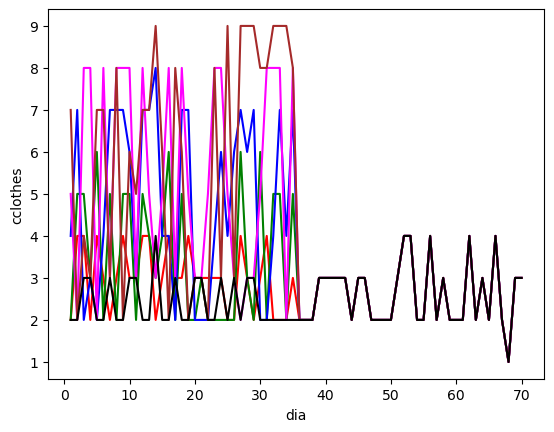

In [24]:
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_test2035, color='red')
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_test4055, color='green')
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="cclothes", data=df_freq_valid, color='black')

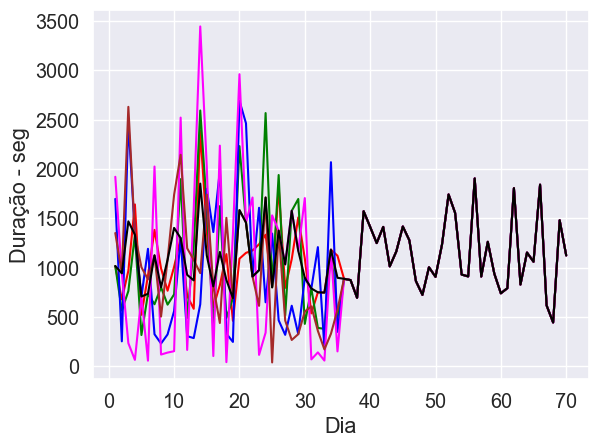

In [25]:
sns.set_theme(font_scale=1.3)
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_test2035, color='red')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_test4055, color='green')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_test6075, color='blue')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_test2095, color='brown')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dur_valid, color='black')
ax.set_xlabel("Dia")
ax.set_ylabel("Duração - seg")
plt.savefig('dur_cclothes.svg')

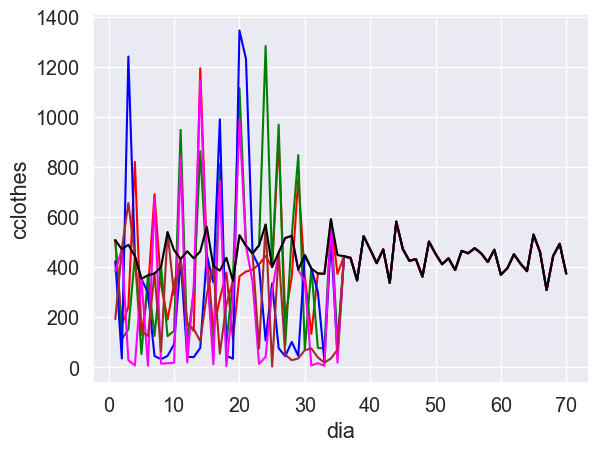

In [26]:
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_test2035, color='red')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_test4055, color='green')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="cclothes", data=df_dfreq_valid, color='black')

In [27]:
# eating

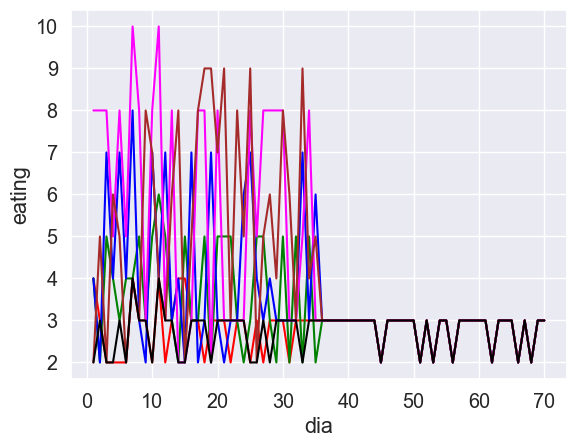

In [28]:
ax = sns.lineplot(x="dia", y="eating", data=df_freq_test2035, color='red')
ax = sns.lineplot(x="dia", y="eating", data=df_freq_test4055, color='green')
ax = sns.lineplot(x="dia", y="eating", data=df_freq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="eating", data=df_freq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="eating", data=df_freq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="eating", data=df_freq_test, color='black')

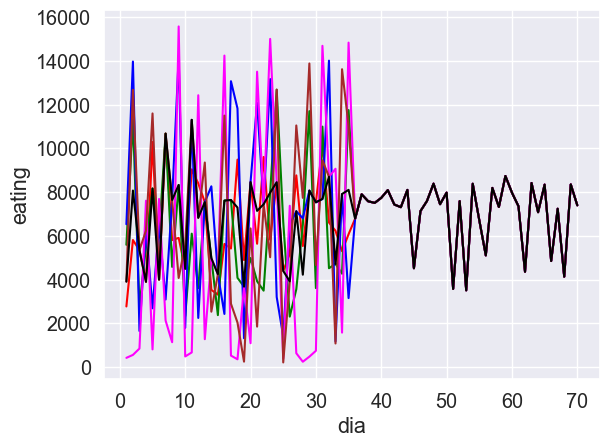

In [29]:
ax = sns.lineplot(x="dia", y="eating", data=df_dur_test2035, color='red')
ax = sns.lineplot(x="dia", y="eating", data=df_dur_test4055, color='green')
ax = sns.lineplot(x="dia", y="eating", data=df_dur_test6075, color='blue')
ax = sns.lineplot(x="dia", y="eating", data=df_dur_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="eating", data=df_dur_test2095, color='brown')
ax = sns.lineplot(x="dia", y="eating", data=df_dur_test, color='black')

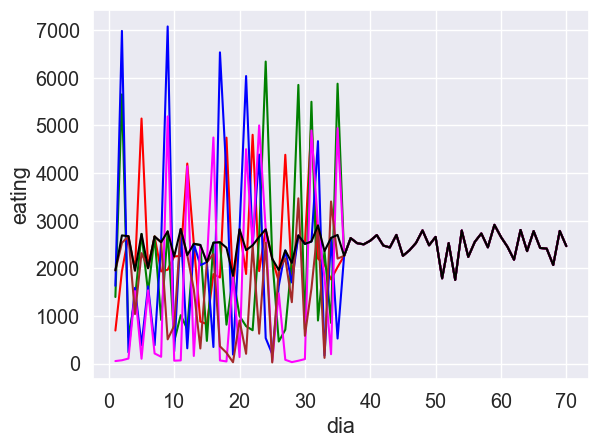

In [30]:
ax = sns.lineplot(x="dia", y="eating", data=df_dfreq_test2035, color='red')
ax = sns.lineplot(x="dia", y="eating", data=df_dfreq_test4055, color='green')
ax = sns.lineplot(x="dia", y="eating", data=df_dfreq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="eating", data=df_dfreq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="eating", data=df_dfreq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="eating", data=df_dfreq_valid, color='black')

In [31]:
# mcoffe

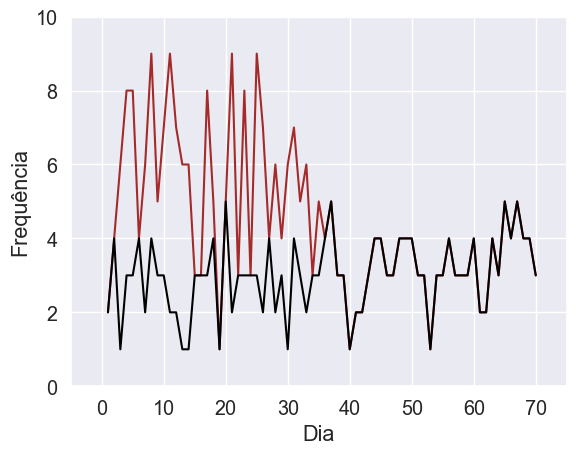

In [32]:
sns.set_theme(font_scale=1.3)
#ax = sns.lineplot(x="dia", y="mcoffe", data=df_freq_test2035, color='red')
#ax = sns.lineplot(x="dia", y="mcoffe", data=df_freq_test4055, color='green')
#ax = sns.lineplot(x="dia", y="mcoffe", data=df_freq_test6075, color='blue')
#ax = sns.lineplot(x="dia", y="mcoffe", data=df_freq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_freq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_freq_test, color='black')
ax.set_xlabel("Dia")
ax.set_ylabel("Frequência")

ax.set_xlim(-5, 75)
ax.set_ylim(0, 10)


plt.savefig('mcoffe_var.svg')

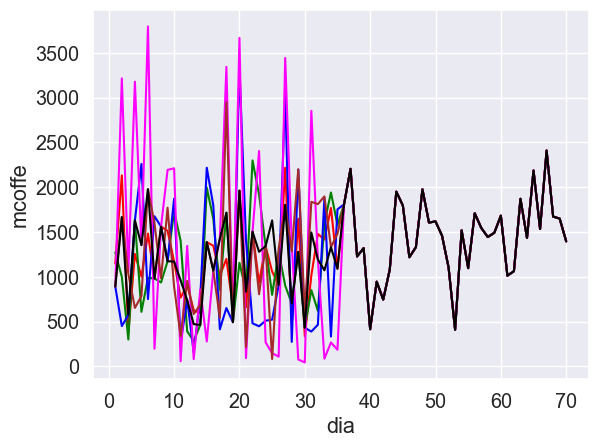

In [33]:
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dur_test2035, color='red')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dur_test4055, color='green')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dur_test6075, color='blue')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dur_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dur_test2095, color='brown')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dur_test, color='black')

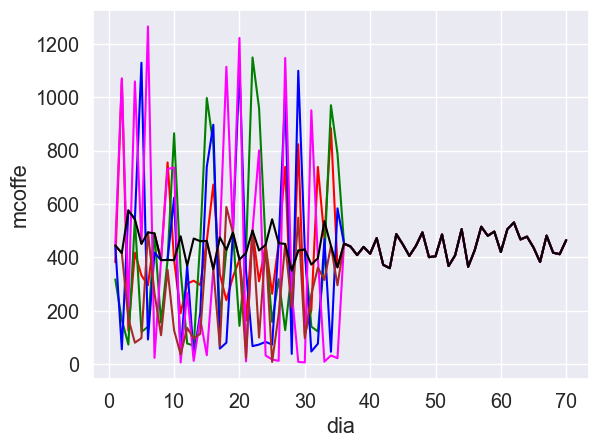

In [34]:
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dfreq_test2035, color='red')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dfreq_test4055, color='green')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dfreq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dfreq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dfreq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="mcoffe", data=df_dfreq_test, color='black')

In [35]:
# mhotfood

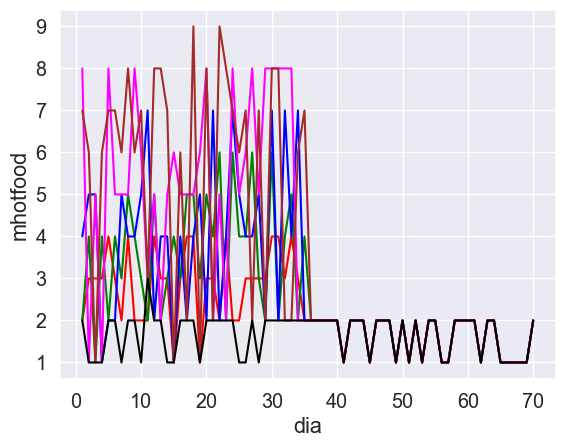

In [36]:
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test2035, color='red')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test4055, color='green')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test, color='black')

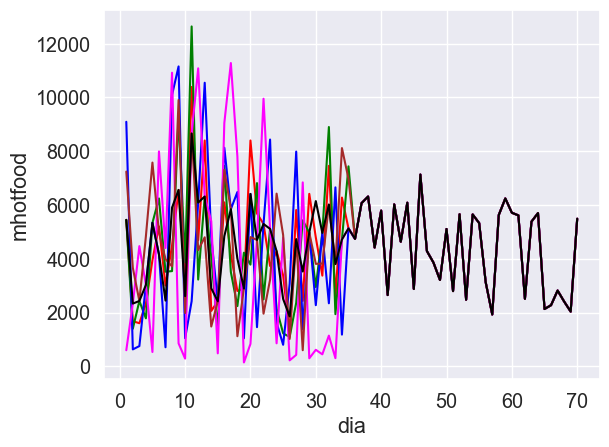

In [37]:
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test2035, color='red')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test4055, color='green')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test6075, color='blue')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test2095, color='brown')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test, color='black')

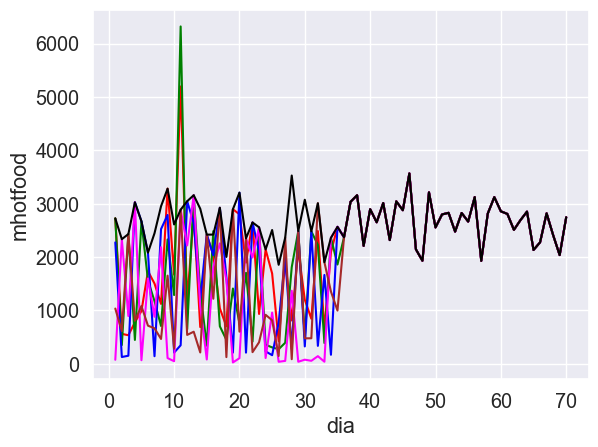

In [38]:
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test2035, color='red')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test4055, color='green')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test, color='black')

In [39]:
# Sleeping

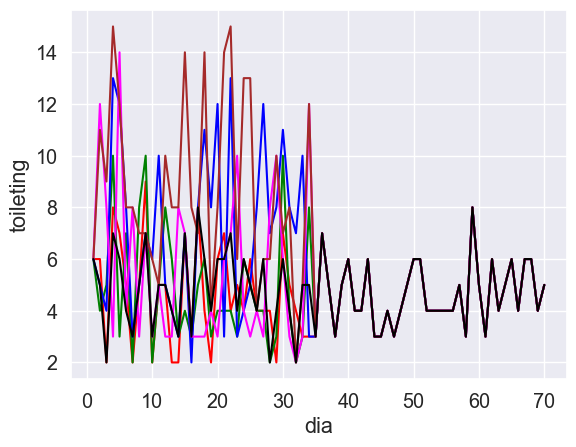

In [40]:
ax = sns.lineplot(x="dia", y="toileting", data=df_freq_test2035, color='red')
ax = sns.lineplot(x="dia", y="toileting", data=df_freq_test4055, color='green')
ax = sns.lineplot(x="dia", y="toileting", data=df_freq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="toileting", data=df_freq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="toileting", data=df_freq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="toileting", data=df_freq_test, color='black')

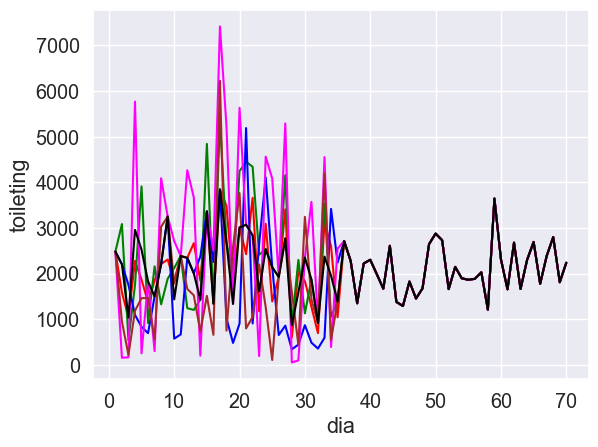

In [41]:
ax = sns.lineplot(x="dia", y="toileting", data=df_dur_test2035, color='red')
ax = sns.lineplot(x="dia", y="toileting", data=df_dur_test4055, color='green')
ax = sns.lineplot(x="dia", y="toileting", data=df_dur_test6075, color='blue')
ax = sns.lineplot(x="dia", y="toileting", data=df_dur_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="toileting", data=df_dur_test2095, color='brown')
ax = sns.lineplot(x="dia", y="toileting", data=df_dur_test, color='black')

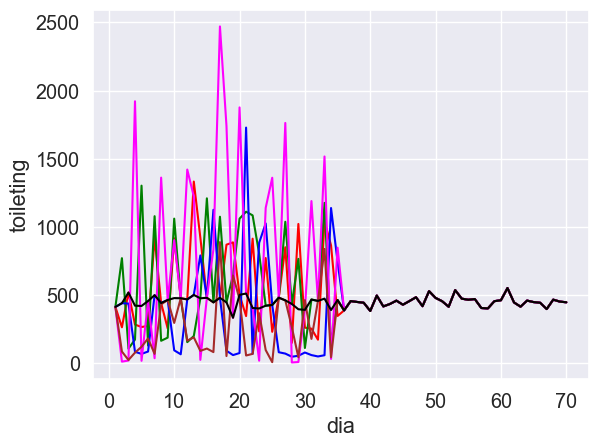

In [42]:
ax = sns.lineplot(x="dia", y="toileting", data=df_dfreq_test2035, color='red')
ax = sns.lineplot(x="dia", y="toileting", data=df_dfreq_test4055, color='green')
ax = sns.lineplot(x="dia", y="toileting", data=df_dfreq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="toileting", data=df_dfreq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="toileting", data=df_dfreq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="toileting", data=df_dfreq_test, color='black')

In [43]:
# mhotfood

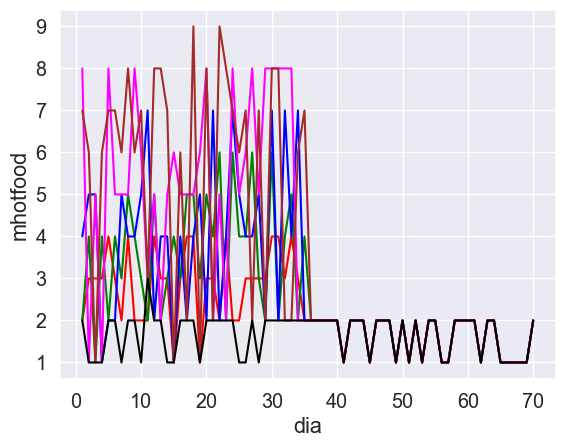

In [44]:
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test2035, color='red')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test4055, color='green')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_freq_test, color='black')

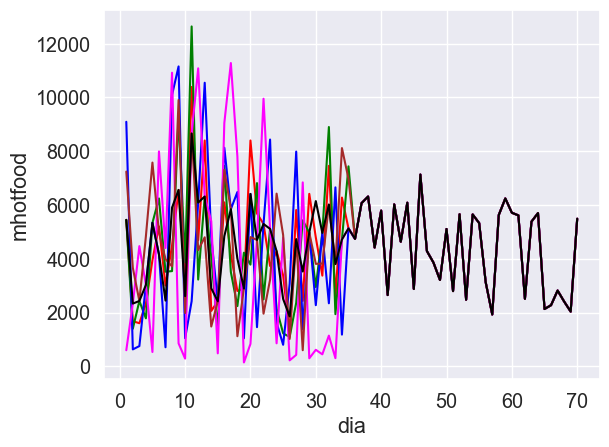

In [45]:
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test2035, color='red')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test4055, color='green')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test6075, color='blue')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test2095, color='brown')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dur_test, color='black')

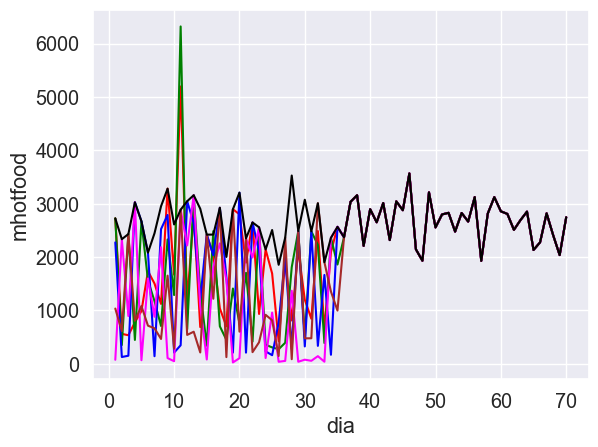

In [46]:
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test2035, color='red')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test4055, color='green')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="mhotfood", data=df_dfreq_test, color='black')

In [47]:
# whandface

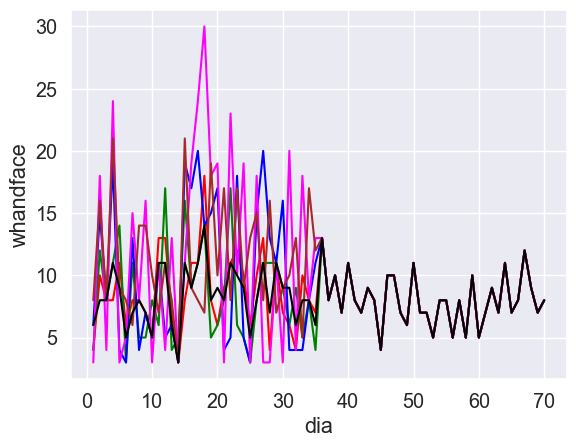

In [48]:
ax = sns.lineplot(x="dia", y="whandface", data=df_freq_test2035, color='red')
ax = sns.lineplot(x="dia", y="whandface", data=df_freq_test4055, color='green')
ax = sns.lineplot(x="dia", y="whandface", data=df_freq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="whandface", data=df_freq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="whandface", data=df_freq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="whandface", data=df_freq_test, color='black')

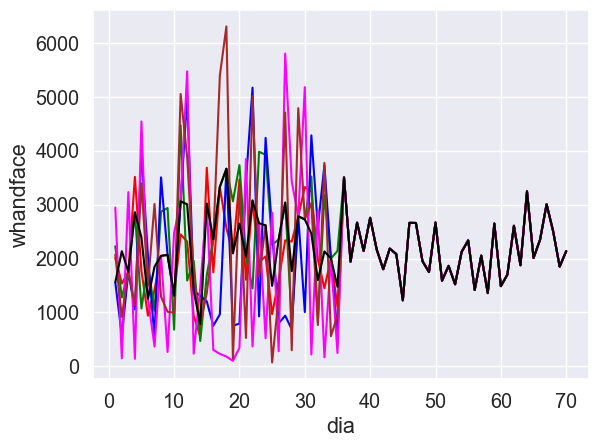

In [49]:
ax = sns.lineplot(x="dia", y="whandface", data=df_dur_test2035, color='red')
ax = sns.lineplot(x="dia", y="whandface", data=df_dur_test4055, color='green')
ax = sns.lineplot(x="dia", y="whandface", data=df_dur_test6075, color='blue')
ax = sns.lineplot(x="dia", y="whandface", data=df_dur_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="whandface", data=df_dur_test2095, color='brown')
ax = sns.lineplot(x="dia", y="whandface", data=df_dur_test, color='black')

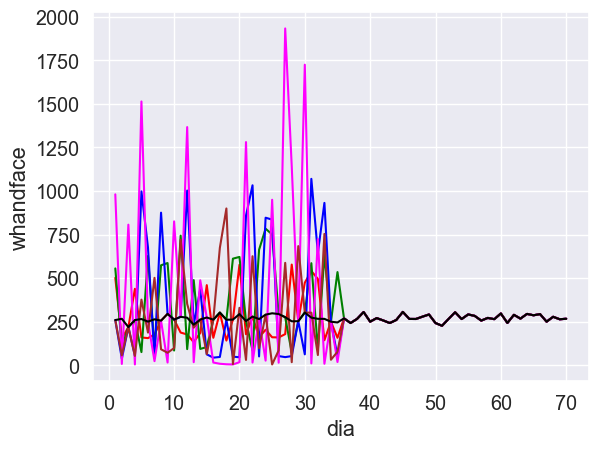

In [50]:
ax = sns.lineplot(x="dia", y="whandface", data=df_dfreq_test2035, color='red')
ax = sns.lineplot(x="dia", y="whandface", data=df_dfreq_test4055, color='green')
ax = sns.lineplot(x="dia", y="whandface", data=df_dfreq_test6075, color='blue')
ax = sns.lineplot(x="dia", y="whandface", data=df_dfreq_test8095, color='magenta')
ax = sns.lineplot(x="dia", y="whandface", data=df_dfreq_test2095, color='brown')
ax = sns.lineplot(x="dia", y="whandface", data=df_dfreq_test, color='black')

In [51]:
print('DONE')

DONE
